Time for 1e-4 inefficiency is 171.94 days


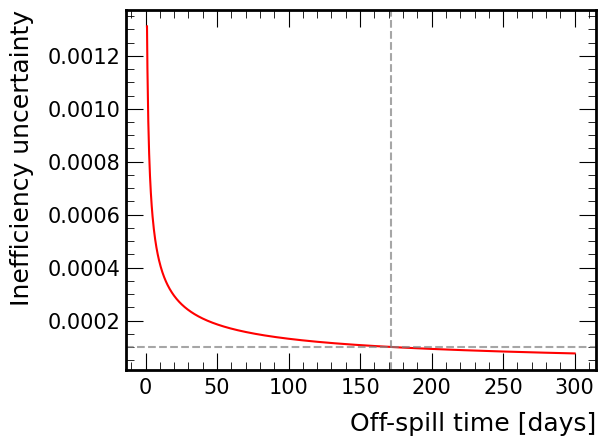

In [3]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("/exp/mu2e/data/users/sgrant/mu2e.mplstyle")

# Calculate parameters

# time (1 to 300 days in 1000 steps)
t = np.linspace(1, 300, 1000)
# Livetime in days
livetime = 1.06288e+07 / (24*3600) 
# Number of background events for this livetime
N_b = 5
# Number of CE-like tracks for this livetime
N_ce = 18914
# Inefficiency for this livetime
ineff = (N_b / N_ce)
# Background rate
rate_b = N_b / livetime 
# Ineffciency uncertainty 
dineff = ineff / np.sqrt(t*rate_b) 

target_dineff = 1e-4
t_sol = (ineff / target_dineff)**2 / rate_b
print(f"Time for 1e-4 inefficiency is {t_sol:.2f} days")

# Basic plot
fig, ax = plt.subplots()
ax.plot(t, dineff)
ax.set_ylabel("Inefficiency uncertainty")
ax.set_xlabel("Off-spill time [days]")
ax.axvline(t_sol, color="gray", linestyle="--", alpha=0.7)
ax.axhline(1e-4, color="gray", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("ineff_unc.png", dpi=300)
plt.show()

Time for 1e-4 inefficiency is 542.89 days


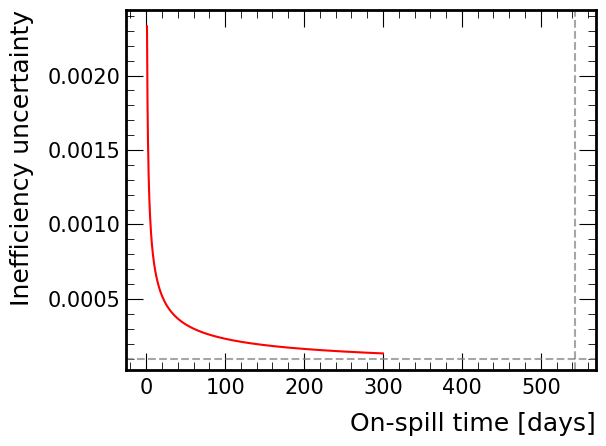

In [6]:
# Packages
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("/exp/mu2e/data/users/sgrant/mu2e.mplstyle")

# Calculate parameters

# time (1 to 300 days in 1000 steps)
t = np.linspace(1, 300, 1000)
# Livetime in days
livetime = 1.06887e+07 / (24*3600) 
# Number of background events for this livetime
N_b = 6
# Number of CE-like tracks for this livetime
N_ce = 11693
# Inefficiency for this livetime
ineff = (N_b / N_ce)
# Background rate
rate_b = N_b / livetime 
# Ineffciency uncertainty 
dineff = ineff / np.sqrt(t*rate_b) 

target_dineff = 1e-4
t_sol = (ineff / target_dineff)**2 / rate_b

print(f"Time for 1e-4 inefficiency is {t_sol:.2f} days")

# Basic plot
fig, ax = plt.subplots()
ax.plot(t, dineff)
ax.axvline(t_sol, color="gray", linestyle="--", alpha=0.7)
ax.axhline(1e-4, color="gray", linestyle="--", alpha=0.7)
ax.set_ylabel("Inefficiency uncertainty")
ax.set_xlabel("On-spill time [days]")
plt.tight_layout()
plt.savefig("ineff_unc.png", dpi=300)
plt.show()

=== CORRECTED WILSON METHOD ===
Off-spill:
  Initial: 5 unvetoed / 18914 CE-like = 2.64e-04
  Rate: 0.041 unvetoed/day
  Time to reach 10⁻⁴ precision: 683 days

On-spill:
  Initial: 6 unvetoed / 11693 CE-like = 5.13e-04
  Rate: 0.048 unvetoed/day
  Time to reach 10⁻⁴ precision: 543 days

=== VERIFICATION ===
Off-spill at t=683 days: uncertainty = 1.00e-04
On-spill at t=543 days: uncertainty = 1.99e-04
=== FORCED WILSON METHOD INTERPRETATION ===
Treating this as binomial: unvetoed events / CE-like events

Off-spill:
  Initial: 5 unvetoed / 18914 CE-like = 2.64e-04
  Rates: 0.041 unvetoed/day, 153.7 CE-like/day

On-spill:
  Initial: 6 unvetoed / 11693 CE-like = 5.13e-04
  Rates: 0.048 unvetoed/day, 94.5 CE-like/day

Time to reach 10⁻⁴ precision:
  Off-spill: 683 days
  On-spill: 543 days

=== WILSON UNCERTAINTY BEHAVIOR ===
t = 10 days:
  Off-spill: p = 2.64e-04, uncertainty = ±1.49e-03
  On-spill:  p = 5.13e-04, uncertainty = ±2.48e-03
t = 100 days:
  Off-spill: p = 2.64e-04, uncertaint

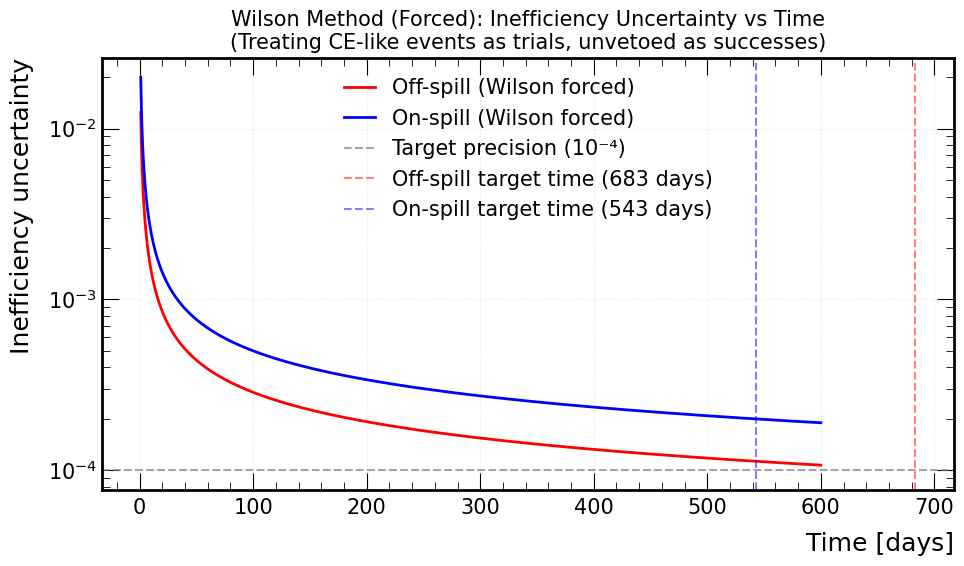

In [53]:
# packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
plt.style.use("/exp/mu2e/data/users/sgrant/mu2e.mplstyle")

# time array
t = np.linspace(1, 600, 1000)

# Wilson confidence interval function
def wilson_interval(n_success, n_total, z=1.96):
    """
    Calculate Wilson confidence interval for binomial proportion
    
    Parameters:
    n_success: number of successes (can be array)
    n_total: total number of trials (can be array)
    z: z-score for confidence level (1.96 for 95% CI)
    
    Returns:
    lower_bound, upper_bound
    """
    # Avoid division by zero
    n_total = np.maximum(n_total, 1e-10)
    
    phat = n_success / n_total
    denom = 1 + z**2 / n_total
    center = (phat + z**2 / (2 * n_total)) / denom
    margin = z * np.sqrt(
        phat * (1 - phat) / n_total + z**2 / (4 * n_total**2)
    ) / denom
    return center - margin, center + margin

# Off-spill data (forcing Wilson interpretation)
livetime_off = 1.06288e+07 / (24*3600)  # convert to days
N_b_off_initial = 5  # unvetoed events (our "successes")
N_ce_off_initial = 18914  # CE-like events (our "trials")
ineff_off = N_b_off_initial / N_ce_off_initial
rate_b_off = N_b_off_initial / livetime_off  # unvetoed rate
rate_ce_off = N_ce_off_initial / livetime_off  # CE-like rate

# Time-dependent counts for off-spill
N_b_off_t = t * rate_b_off  # time-dependent unvetoed events
N_ce_off_t = t * rate_ce_off  # time-dependent CE-like events

# Wilson interval for off-spill (treating as binomial)
lower_off, upper_off = wilson_interval(N_b_off_t, N_ce_off_t)
dineff_off = (upper_off - lower_off) / 2  # symmetric uncertainty estimate

# Solve numerically for when Wilson uncertainty equals 1e-4
def find_target_time(rate_b, ineff, target_uncertainty=1e-4):
    """Find time when Wilson uncertainty reaches target value"""
    from scipy.optimize import brentq
    
    def uncertainty_diff(t):
        n_b = t * rate_b
        n_ce = n_b / ineff
        lower, upper = wilson_interval(n_b, n_ce)
        current_uncertainty = (upper - lower) / 2
        return current_uncertainty - target_uncertainty
    
    try:
        # Search between 1 day and 10000 days
        t_solution = brentq(uncertainty_diff, 1, 10000)
        return t_solution
    except:
        return np.nan

t_sol_off = find_target_time(rate_b_off, ineff_off)

# On-spill data (forcing Wilson interpretation)
livetime_on = 1.06887e+07 / (24*3600)  # convert to days
N_b_on_initial = 6  # unvetoed events (our "successes")
N_ce_on_initial = 11693  # CE-like events (our "trials")
ineff_on = N_b_on_initial / N_ce_on_initial
rate_b_on = N_b_on_initial / livetime_on  # unvetoed rate
rate_ce_on = N_ce_on_initial / livetime_on  # CE-like rate

# Time-dependent counts for on-spill
N_b_on_t = t * rate_b_on  # time-dependent unvetoed events
N_ce_on_t = t * rate_ce_on  # time-dependent CE-like events

# Wilson interval for on-spill (treating as binomial)
lower_on, upper_on = wilson_interval(N_b_on_t, N_ce_on_t)
dineff_on = (upper_on - lower_on) / 2  # symmetric uncertainty estimate

# Time to reach target inefficiency precision for on-spill
t_sol_on = (ineff_on / 1e-4)**2 / rate_b_on

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot uncertainty curves
ax.plot(t, dineff_off, label="Off-spill (Wilson forced)", color="red", linewidth=2)
ax.plot(t, dineff_on, label="On-spill (Wilson forced)", color="blue", linewidth=2)

# Reference lines
ax.axhline(1e-4, color="gray", linestyle="--", alpha=0.7, label="Target precision (10⁻⁴)")
ax.axvline(t_sol_off, color="red", linestyle="--", alpha=0.5, 
           label=f"Off-spill target time ({t_sol_off:.0f} days)")
ax.axvline(t_sol_on, color="blue", linestyle="--", alpha=0.5,
           label=f"On-spill target time ({t_sol_on:.0f} days)")

# Set logarithmic scale for y-axis
ax.set_yscale('log')

# Labels and formatting
ax.set_ylabel("Inefficiency uncertainty")
ax.set_xlabel("Time [days]")
ax.set_title("Wilson Method (Forced): Inefficiency Uncertainty vs Time\n(Treating CE-like events as trials, unvetoed as successes)")
ax.legend()
ax.grid(True, alpha=0.3)

# Tight layout and save
plt.tight_layout()
plt.savefig("ineff_unc_overlay_wilson_forced.png", dpi=300, bbox_inches='tight')
# Print diagnostic information
print("=== CORRECTED WILSON METHOD ===")
print(f"Off-spill:")
print(f"  Initial: {N_b_off} unvetoed / {N_ce_off} CE-like = {ineff_off:.2e}")
print(f"  Rate: {rate_b_off:.3f} unvetoed/day")
print(f"  Time to reach 10⁻⁴ precision: {t_sol_off:.0f} days")
print()
print(f"On-spill:")
print(f"  Initial: {N_b_on} unvetoed / {N_ce_on} CE-like = {ineff_on:.2e}")
print(f"  Rate: {rate_b_on:.3f} unvetoed/day")
print(f"  Time to reach 10⁻⁴ precision: {t_sol_on:.0f} days")

# Verify the intersection
print(f"\n=== VERIFICATION ===")
for label, t_sol, rate_b, ineff in [("Off-spill", t_sol_off, rate_b_off, ineff_off),
                                   ("On-spill", t_sol_on, rate_b_on, ineff_on)]:
    if not np.isnan(t_sol):
        n_b_check = t_sol * rate_b
        n_ce_check = n_b_check / ineff
        lower_check, upper_check = wilson_interval(n_b_check, n_ce_check)
        uncertainty_check = (upper_check - lower_check) / 2
        print(f"{label} at t={t_sol:.0f} days: uncertainty = {uncertainty_check:.2e}")
    else:
        print(f"{label}: Could not find intersection within search range")

# Print diagnostic information
print("=== FORCED WILSON METHOD INTERPRETATION ===")
print("Treating this as binomial: unvetoed events / CE-like events")
print()
print(f"Off-spill:")
print(f"  Initial: {N_b_off_initial} unvetoed / {N_ce_off_initial} CE-like = {ineff_off:.2e}")
print(f"  Rates: {rate_b_off:.3f} unvetoed/day, {rate_ce_off:.1f} CE-like/day")
print()
print(f"On-spill:")
print(f"  Initial: {N_b_on_initial} unvetoed / {N_ce_on_initial} CE-like = {ineff_on:.2e}")
print(f"  Rates: {rate_b_on:.3f} unvetoed/day, {rate_ce_on:.1f} CE-like/day")
print()
print(f"Time to reach 10⁻⁴ precision:")
print(f"  Off-spill: {t_sol_off:.0f} days")
print(f"  On-spill: {t_sol_on:.0f} days")

# Show the characteristic Wilson behavior at different time points
print("\n=== WILSON UNCERTAINTY BEHAVIOR ===")
test_times = [10, 100, 300, 500]
for t_test in test_times:
    n_b_off = t_test * rate_b_off
    n_ce_off = t_test * rate_ce_off
    n_b_on = t_test * rate_b_on  
    n_ce_on = t_test * rate_ce_on
    
    lower_off_test, upper_off_test = wilson_interval(n_b_off, n_ce_off)
    lower_on_test, upper_on_test = wilson_interval(n_b_on, n_ce_on)
    
    p_off = n_b_off / n_ce_off
    p_on = n_b_on / n_ce_on
    
    print(f"t = {t_test} days:")
    print(f"  Off-spill: p = {p_off:.2e}, uncertainty = ±{(upper_off_test - lower_off_test)/2:.2e}")
    print(f"  On-spill:  p = {p_on:.2e}, uncertainty = ±{(upper_on_test - lower_on_test)/2:.2e}")

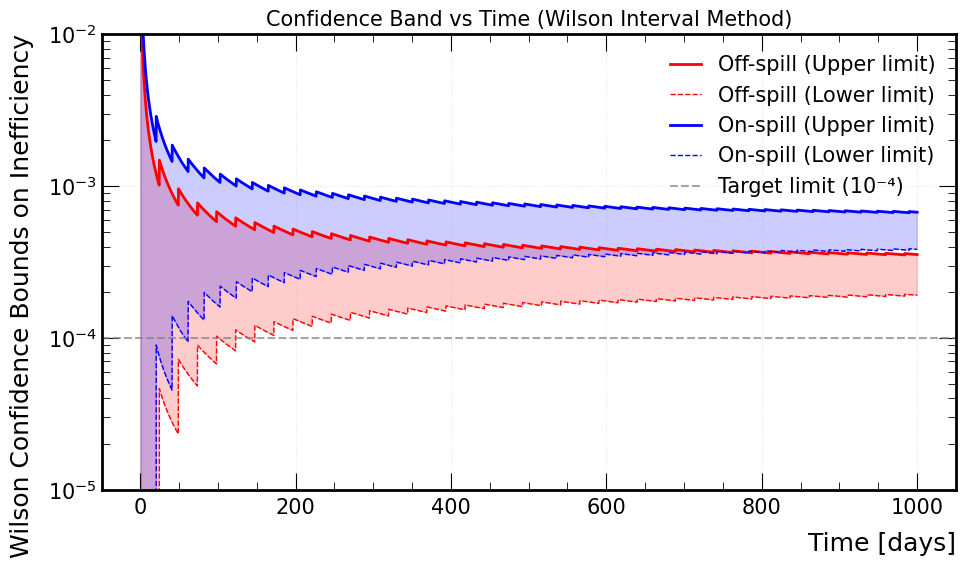

=== WILSON CONFIDENCE BAND SUMMARY ===
Off-spill ineff: 2.64e-04, Rate: 0.041/day
  → No solution
On-spill ineff: 5.13e-04, Rate: 0.048/day
  → No solution

=== MIN/MAX CHECK ===
Off-spill min upper: 3.52e-04, max lower: 1.94e-04
On-spill  min upper: 6.68e-04, max lower: 3.87e-04


In [69]:
# packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from statsmodels.stats.proportion import proportion_confint
plt.style.use("/exp/mu2e/data/users/sgrant/mu2e.mplstyle")

# time array
t = np.linspace(1, 1000, 5000)

# Wilson interval function
def wilson_interval(k, N, alpha=0.05):
    """Wilson interval using statsmodels"""
    lower, upper = proportion_confint(k, N, alpha=alpha, method="wilson")
    return lower, upper

# Off-spill data
livetime_off = 1.06288e+07 / (24*3600)  # convert to days
N_b_off = 5
N_ce_off = 18914
ineff_off = N_b_off / N_ce_off
rate_b_off = N_b_off / livetime_off  # counts/day

# Time-dependent counts for off-spill
N_b_off_t = t * rate_b_off
N_ce_off_t = N_b_off_t / ineff_off

# Apply Wilson intervals
lower_off = np.zeros_like(t)
upper_off = np.zeros_like(t)

for i, (n_b, n_ce) in enumerate(zip(N_b_off_t, N_ce_off_t)):
    if n_ce > 0 and n_b <= n_ce:
        lower_off[i], upper_off[i] = wilson_interval(int(n_b), int(n_ce))
    else:
        lower_off[i], upper_off[i] = 0, 1

# On-spill data
livetime_on = 1.06887e+07 / (24*3600)  # convert to days
N_b_on = 6
N_ce_on = 11693
ineff_on = N_b_on / N_ce_on
rate_b_on = N_b_on / livetime_on  # counts/day

# Time-dependent counts for on-spill
N_b_on_t = t * rate_b_on
N_ce_on_t = N_b_on_t / ineff_on

# Apply Wilson intervals
lower_on = np.zeros_like(t)
upper_on = np.zeros_like(t)

for i, (n_b, n_ce) in enumerate(zip(N_b_on_t, N_ce_on_t)):
    if n_ce > 0 and n_b <= n_ce:
        lower_on[i], upper_on[i] = wilson_interval(int(n_b), int(n_ce))
    else:
        lower_on[i], upper_on[i] = 0, 1

# Solve numerically for when upper limit drops below 1e-4
def find_target_time(rate_b, ineff, target_limit=1e-4):
    def limit_diff(t):
        n_b = int(t * rate_b)
        n_ce = int(n_b / ineff)
        if n_ce > 0 and n_b <= n_ce:
            _, upper = wilson_interval(n_b, n_ce)
            return upper - target_limit
        else:
            return 1
    try:
        t_solution = brentq(limit_diff, 1, 10000)
        return t_solution
    except:
        return np.nan

t_sol_off = find_target_time(rate_b_off, ineff_off)
t_sol_on = find_target_time(rate_b_on, ineff_on)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot upper and lower limits
ax.plot(t, upper_off, label="Off-spill (Upper limit)", color="red", linewidth=2)
ax.plot(t, lower_off, label="Off-spill (Lower limit)", color="red", linestyle="--", linewidth=1)

ax.plot(t, upper_on, label="On-spill (Upper limit)", color="blue", linewidth=2)
ax.plot(t, lower_on, label="On-spill (Lower limit)", color="blue", linestyle="--", linewidth=1)

# Fill confidence bands
ax.fill_between(t, lower_off, upper_off, color="red", alpha=0.2)
ax.fill_between(t, lower_on, upper_on, color="blue", alpha=0.2)

# Reference line
ax.axhline(1e-4, color="gray", linestyle="--", alpha=0.7, label="Target limit (10⁻⁴)")
if not np.isnan(t_sol_off):
    ax.axvline(t_sol_off, color="red", linestyle="--", alpha=0.5, 
               label=f"Off-spill time to UL = 10⁻⁴ ({t_sol_off:.0f} d)")
if not np.isnan(t_sol_on):
    ax.axvline(t_sol_on, color="blue", linestyle="--", alpha=0.5,
               label=f"On-spill time to UL = 10⁻⁴ ({t_sol_on:.0f} d)")

# Set logarithmic scale
ax.set_yscale('log')
ax.set_ylim(1e-5, 1e-2)


# Labels and formatting
ax.set_ylabel("Wilson Confidence Bounds on Inefficiency")
ax.set_xlabel("Time [days]")
ax.set_title("Confidence Band vs Time (Wilson Interval Method)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("ineff_conf_band_wilson.png", dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("=== WILSON CONFIDENCE BAND SUMMARY ===")
print(f"Off-spill ineff: {ineff_off:.2e}, Rate: {rate_b_off:.3f}/day")
print(f"  → Time to upper < 1e-4: {t_sol_off:.0f} days" if not np.isnan(t_sol_off) else "  → No solution")
print(f"On-spill ineff: {ineff_on:.2e}, Rate: {rate_b_on:.3f}/day")
print(f"  → Time to upper < 1e-4: {t_sol_on:.0f} days" if not np.isnan(t_sol_on) else "  → No solution")

print("\n=== MIN/MAX CHECK ===")
print(f"Off-spill min upper: {np.min(upper_off):.2e}, max lower: {np.max(lower_off):.2e}")
print(f"On-spill  min upper: {np.min(upper_on):.2e}, max lower: {np.max(lower_on):.2e}")

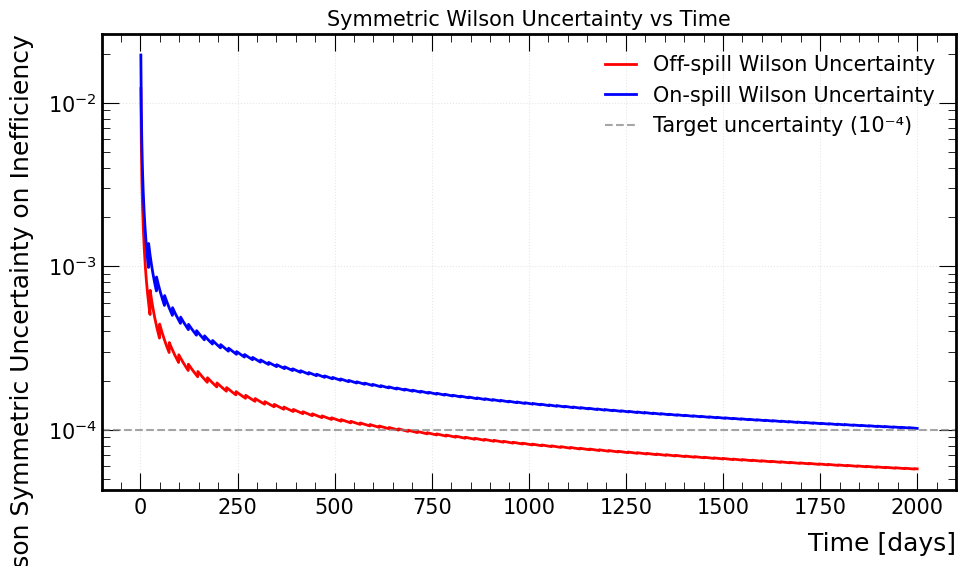

In [63]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot symmetric uncertainty (upper - lower)/2
uncertainty_off = (upper_off - lower_off) / 2
uncertainty_on = (upper_on - lower_on) / 2

ax.plot(t, uncertainty_off, label="Off-spill Wilson Uncertainty", color="red", linewidth=2)
ax.plot(t, uncertainty_on, label="On-spill Wilson Uncertainty", color="blue", linewidth=2)

# Reference line
ax.axhline(1e-4, color="gray", linestyle="--", alpha=0.7, label="Target uncertainty (10⁻⁴)")
if not np.isnan(t_sol_off):
    ax.axvline(t_sol_off, color="red", linestyle="--", alpha=0.5, 
               label=f"Off-spill time to UL = 10⁻⁴ ({t_sol_off:.0f} d)")
if not np.isnan(t_sol_on):
    ax.axvline(t_sol_on, color="blue", linestyle="--", alpha=0.5,
               label=f"On-spill time to UL = 10⁻⁴ ({t_sol_on:.0f} d)")

# Set logarithmic scale
ax.set_yscale('log')

# Labels and formatting
ax.set_ylabel("Wilson Symmetric Uncertainty on Inefficiency")
ax.set_xlabel("Time [days]")
ax.set_title("Symmetric Wilson Uncertainty vs Time")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("ineff_uncertainty_wilson.png", dpi=300, bbox_inches='tight')
plt.show()